In [ ]:
import re

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("final_data.csv")
data

,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars_x,review_count_x,...,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_funny,compliment_writer,compliment_photos
0,yPSejq3_erxo9zdVYTBnZA,Los Agaves,600 N Milpas St,Santa Barbara,CA,93101,34.427494,-119.686624,4.5,3834,...,204,4.13,134,23,28,2,3,427,190,37
1,yPSejq3_erxo9zdVYTBnZA,Los Agaves,600 N Milpas St,Santa Barbara,CA,93101,34.427494,-119.686624,4.5,3834,...,10,4.13,1,0,0,0,0,6,0,7
2,yPSejq3_erxo9zdVYTBnZA,Los Agaves,600 N Milpas St,Santa Barbara,CA,93101,34.427494,-119.686624,4.5,3834,...,0,1.86,0,0,0,0,0,0,0,0
3,U3grYFIeu6RgAAQgdriHww,Brophy Bros - Santa Barbara,119 Harbor Way,Santa Barbara,CA,93109,34.403759,-119.693992,4.0,2940,...,0,1.86,0,0,0,0,0,0,0,0
4,yPSejq3_erxo9zdVYTBnZA,Los Agaves,600 N Milpas St,Santa Barbara,CA,93101,34.427494,-119.686624,4.5,3834,...,33,4.02,6,2,2,0,1,9,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162278,vyxxsn2l6ELF2Yoxr6BWcw,Westmont Dining Commons,955 La Paz Rd,Santa Barbara,CA,93108,34.450364,-119.661552,3.0,7,...,0,5.00,0,0,0,0,0,0,0,0
162279,vyxxsn2l6ELF2Yoxr6BWcw,Westmont Dining Commons,955 La Paz Rd,Santa Barbara,CA,93108,34.450364,-119.661552,3.0,7,...,0,3.00,0,0,0,0,0,0,0,0
162280,acqDz7WDsCS3WiLxHVceOg,Café Lido,1111 E Cabrillo Blvd,Santa Barbara,CA,93103,34.417877,-119.669396,3.5,11,...,0,2.00,0,0,0,0,0,0,0,0
162281,acqDz7WDsCS3WiLxHVceOg,Café Lido,1111 E Cabrillo Blvd,Santa Barbara,CA,93103,34.417877,-119.669396,3.5,11,...,0,3.58,0,0,0,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162283 entries, 0 to 162282
Data columns (total 73 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 162283 non-null  object 
 1   name_x                      162283 non-null  object 
 2   address                     161939 non-null  object 
 3   city                        162283 non-null  object 
 4   state                       162283 non-null  object 
 5   postal_code                 162283 non-null  int64  
 6   latitude                    162283 non-null  float64
 7   longitude                   162283 non-null  float64
 8   stars_x                     162283 non-null  float64
 9   review_count_x              162283 non-null  int64  
 10  is_open                     162283 non-null  int64  
 11  categories                  162283 non-null  object 
 12  RestaurantsTakeOut          158176 non-null  object 
 13  NoiseLevel    

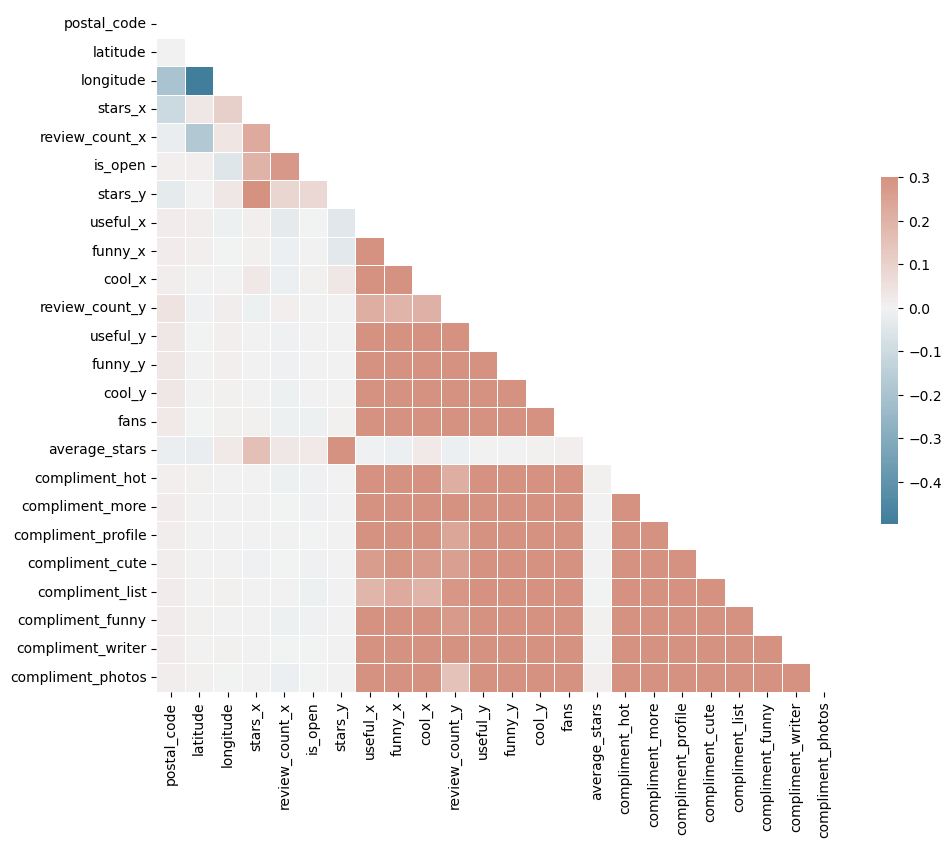

In [ ]:
numeric_df = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
df = data.copy()

In [ ]:
df = df.drop(['name_x', 'address', 'city', 'state', 'latitude', 'longitude'], axis=1)

In [ ]:
target_variable = df[['stars_x']]

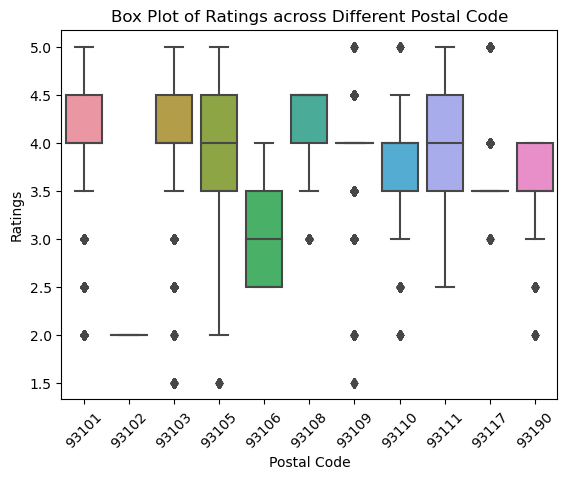

In [ ]:
sns.boxplot(x='postal_code', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Ratings')
plt.xticks(rotation=45)  # Rotate category labels to avoid overlap
plt.show()

<Axes: xlabel='review_count_x', ylabel='Density'>

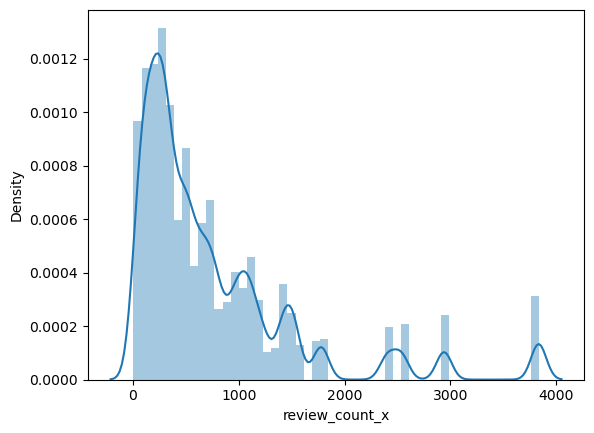

In [ ]:
sns.distplot(df[df['review_count_x'].notnull()]['review_count_x'])

todo: review_count_x: 可以分桶或者transformation

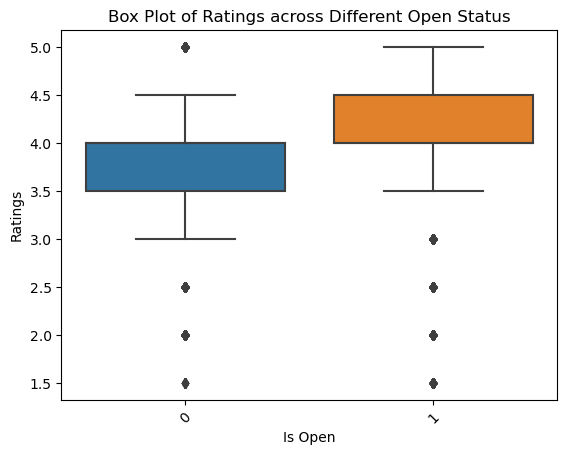

In [ ]:
sns.boxplot(x='is_open', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Open Status')
plt.xlabel('Is Open')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cluster_cat = pd.read_csv("cluster_cat.csv")
cluster_cat

,business_id,name_x,categories,category_Casual Dining & Drinks,category_Diverse Cuisine & Entertainment,category_Health & Lifestyle,category_Nightlife Essentials,category_Traditional Comfort Foods,category_Sophisticated Eats
0,yPSejq3_erxo9zdVYTBnZA,Los Agaves,"Mexican, Restaurants",0,1,0,0,0,0
1,U3grYFIeu6RgAAQgdriHww,Brophy Bros - Santa Barbara,"Cocktail Bars, Fish & Chips, Nightlife, Seafoo...",1,1,0,1,0,1
2,VAIOtbsxdNmuhUKkQZFRlA,Renaud's Patisserie & Bistro,"French, Cafes, Restaurants, Breakfast & Brunch...",1,1,0,0,1,1
3,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",1,1,0,0,0,1
4,bjhCtlYHrkgA5Ku8l-rB3g,Our Daily Bread,"Restaurants, Cafes, Breakfast & Brunch, Bakeri...",0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
762,6RBrYMiAf8jFJI4fDoQpcw,De La Guerra Dining Commons,"Cafeteria, Cafes, American (New), Restaurants,...",1,1,1,0,0,1
763,d1sY9JkgkGt3_P2fWZ2eFw,Apero,"Burgers, Restaurants, Tapas Bars, Belgian, Bar...",0,1,1,1,1,1
764,pBPfWo_WfHVVkSKD_P3osg,Lucca Truck,"Restaurants, Event Planning & Services, Catere...",1,0,0,0,1,1
765,acqDz7WDsCS3WiLxHVceOg,Café Lido,"Italian, Cafes, Mediterranean, Restaurants",0,0,0,1,0,1


In [ ]:
df = pd.merge(left=df, right=cluster_cat.drop(['name_x','categories'], axis=1), on='business_id',how='inner').drop('categories', axis=1)

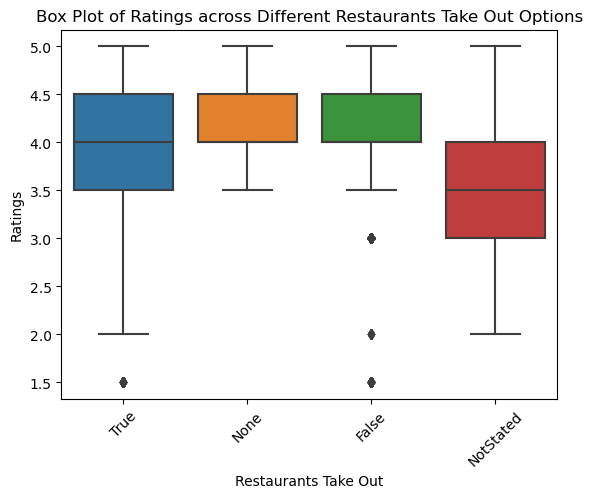

In [ ]:
df = df.fillna({'RestaurantsTakeOut': 'NotStated'})
sns.boxplot(x='RestaurantsTakeOut', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Restaurants Take Out Options')
plt.xlabel('Restaurants Take Out')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['NoiseLevel'].value_counts()

u'average'      113018
'average'        14659
u'loud'          13883
u'quiet'          9013
'quiet'            742
'loud'             298
u'very_loud'       188
'very_loud'         22
Name: NoiseLevel, dtype: int64

In [ ]:
import re
df = df.fillna({'NoiseLevel': "'average'"})
df['NoiseLevel'] = df['NoiseLevel'].astype(str).apply(lambda x: re.findall(r"'(.*?)'", x)[0] if re.findall(r"'(.*?)'", x) else x)
df['NoiseLevel'].value_counts()

average      138137
loud          14181
quiet          9755
very_loud       210
Name: NoiseLevel, dtype: int64

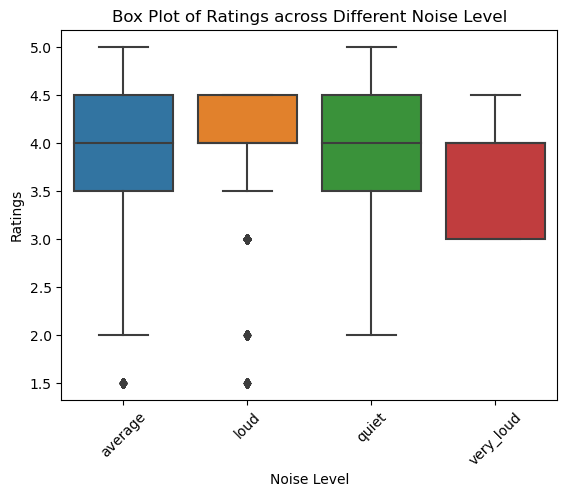

In [ ]:
sns.boxplot(x='NoiseLevel', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

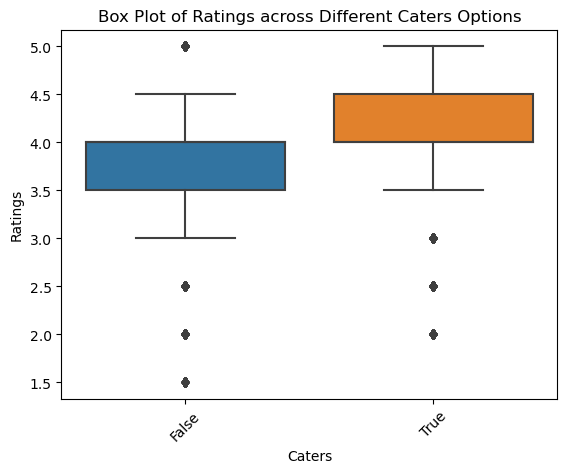

In [ ]:
df['Caters'] = df['Caters'].fillna(False)
sns.boxplot(x='Caters', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Caters Options')
plt.xlabel('Caters')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

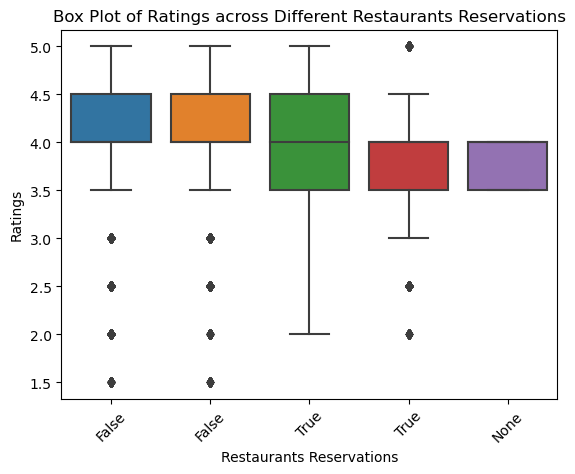

In [ ]:
df = df.fillna({'RestaurantsReservations': "False"})
sns.boxplot(x='RestaurantsReservations', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Restaurants Reservations')
plt.xlabel('Restaurants Reservations')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

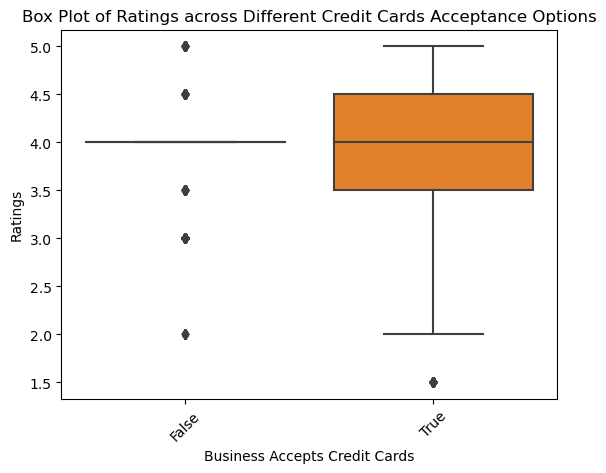

In [ ]:
df = df.fillna({'BusinessAcceptsCreditCards': df['BusinessAcceptsCreditCards'].mode()[0]})
sns.boxplot(x='BusinessAcceptsCreditCards', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Credit Cards Acceptance Options')
plt.xlabel('Business Accepts Credit Cards')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

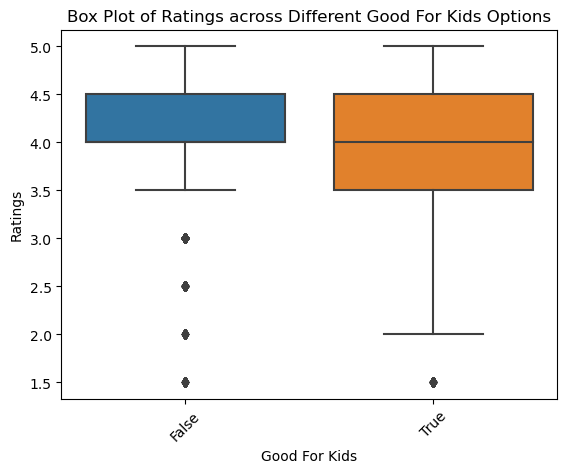

In [ ]:
df = df.fillna({'GoodForKids': df['GoodForKids'].mode()[0]})
sns.boxplot(x='GoodForKids', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Good For Kids Options')
plt.xlabel('Good For Kids')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.fillna({'RestaurantsPriceRange2': 2.0})
df['RestaurantsPriceRange2'].value_counts()

2.0     104142
2        21768
1.0      14072
3.0      11532
1         4298
3         3146
4.0       2557
4          763
None         5
Name: RestaurantsPriceRange2, dtype: int64

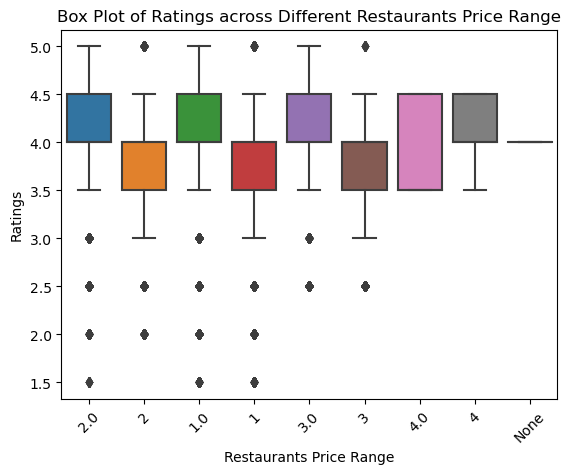

In [ ]:
sns.boxplot(x='RestaurantsPriceRange2', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Restaurants Price Range')
plt.xlabel('Restaurants Price Range')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

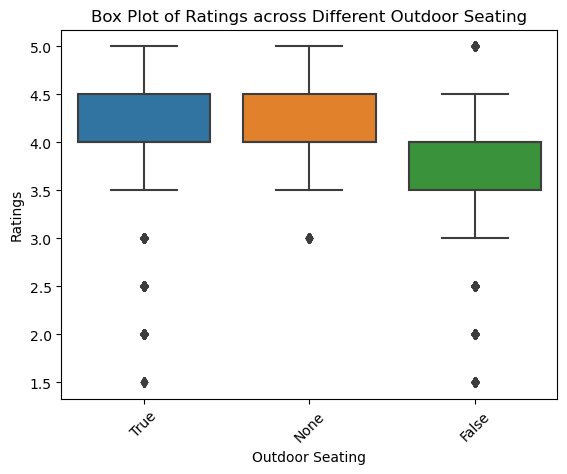

In [ ]:
df = df.fillna({'OutdoorSeating': df['OutdoorSeating'].mode()[0]})
sns.boxplot(x='OutdoorSeating', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Outdoor Seating')
plt.xlabel('Outdoor Seating')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.fillna({'RestaurantsDelivery': 'NotStated'})
selected_columns = ['HasTV',
                    'RestaurantsAttire',
                    'Alcohol',
                    'RestaurantsGoodForGroups',
                    'BikeParking',
                    'WiFi',
                    'BusinessParking_garage',
                    'BusinessParking_street',
                    'BusinessParking_validated']
df_sc_mode = df[selected_columns].mode().iloc[0]
df = df.fillna(dict(zip(selected_columns, df_sc_mode)))

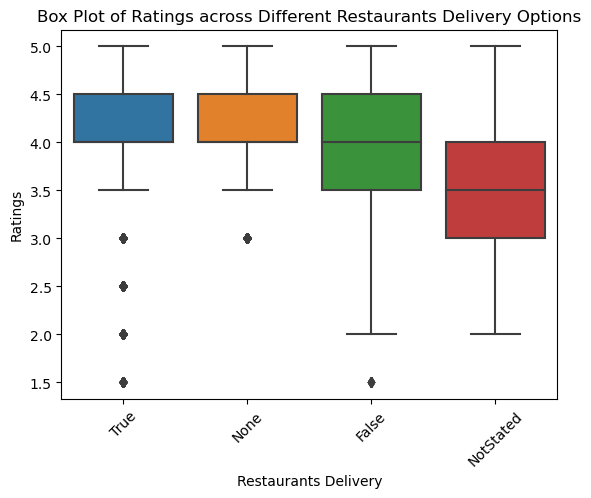

In [ ]:
sns.boxplot(x='RestaurantsDelivery', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Restaurants Delivery Options')
plt.xlabel('Restaurants Delivery')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

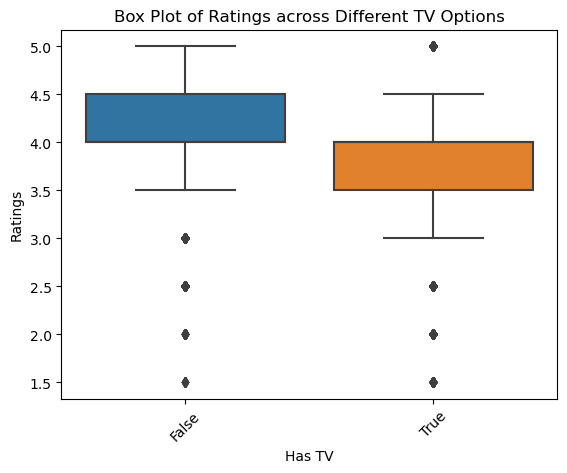

In [ ]:
sns.boxplot(x='HasTV', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different TV Options')
plt.xlabel('Has TV')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.fillna({'RestaurantsAttire': 'casual'})

In [ ]:
df['RestaurantsAttire'] = df['RestaurantsAttire'].astype(str).apply(lambda x: re.findall(r"'(.*?)'", x)[0] if re.findall(r"'(.*?)'", x) else x)
df['RestaurantsAttire'].value_counts()

casual    157009
dressy      5242
formal        32
Name: RestaurantsAttire, dtype: int64

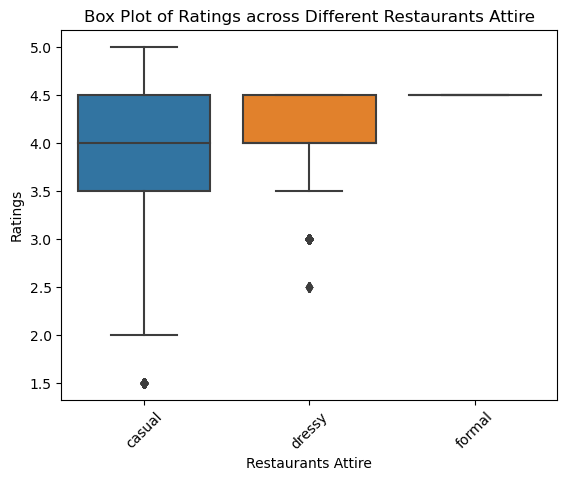

In [ ]:
sns.boxplot(x='RestaurantsAttire', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Restaurants Attire')
plt.xlabel('Restaurants Attire')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.fillna({'Alcohol': 'full_bar'})
df['Alcohol'] = df['Alcohol'].astype(str).apply(lambda x: re.findall(r"'(.*?)'", x)[0] if re.findall(r"'(.*?)'", x) else x)
df['Alcohol'].value_counts()

full_bar         71495
beer_and_wine    70992
none             19796
Name: Alcohol, dtype: int64

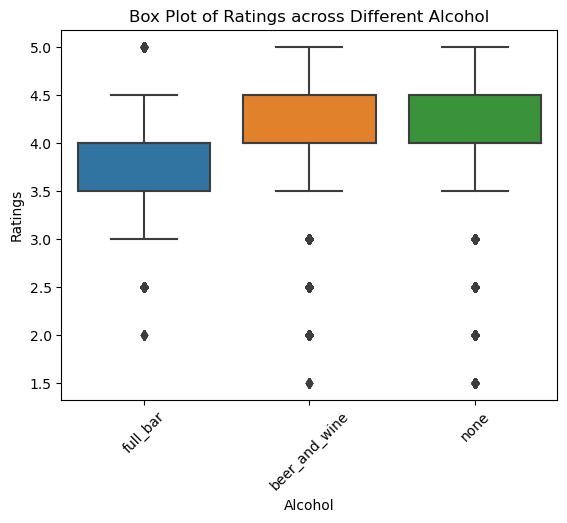

In [ ]:
sns.boxplot(x='Alcohol', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

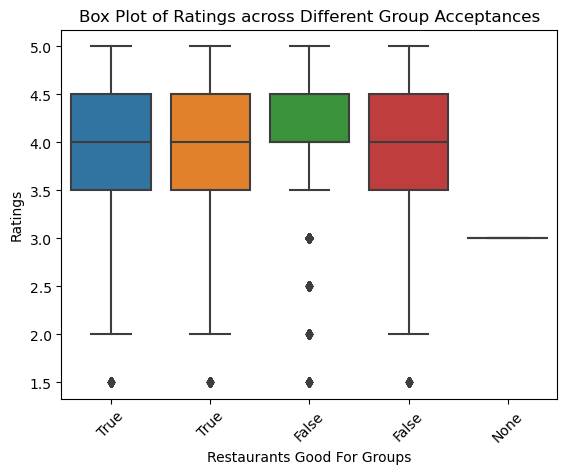

In [ ]:
sns.boxplot(x='RestaurantsGoodForGroups', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Group Acceptances')
plt.xlabel('Restaurants Good For Groups')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

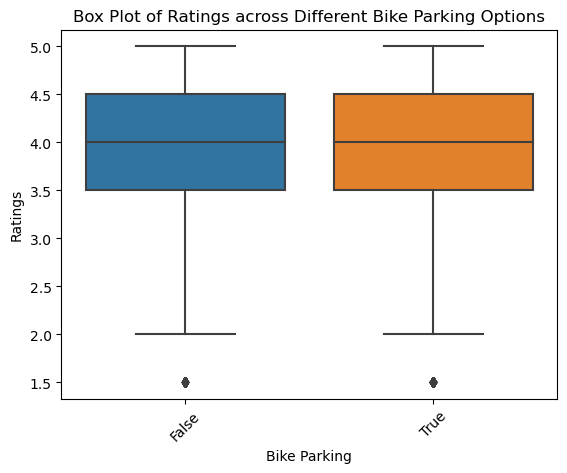

In [ ]:
sns.boxplot(x='BikeParking', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Bike Parking Options')
plt.xlabel('Bike Parking')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.fillna({'WiFi': 'free'})
df['WiFi'] = df['WiFi'].astype(str).apply(lambda x: re.findall(r"'(.*?)'", x)[0] if re.findall(r"'(.*?)'", x) else x)
df['WiFi'].value_counts()

free    87518
no      74281
paid      473
None       11
Name: WiFi, dtype: int64

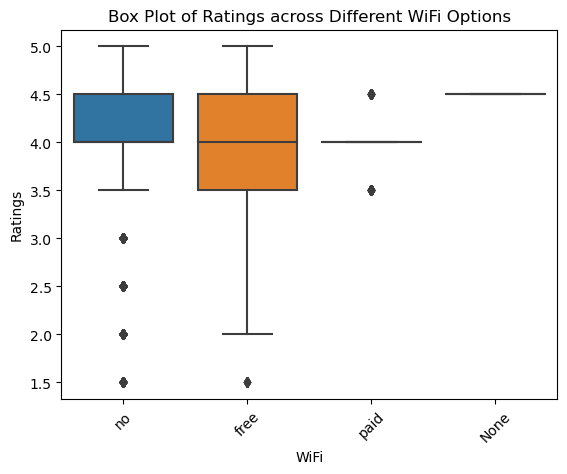

In [ ]:
sns.boxplot(x='WiFi', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different WiFi Options')
plt.xlabel('WiFi')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

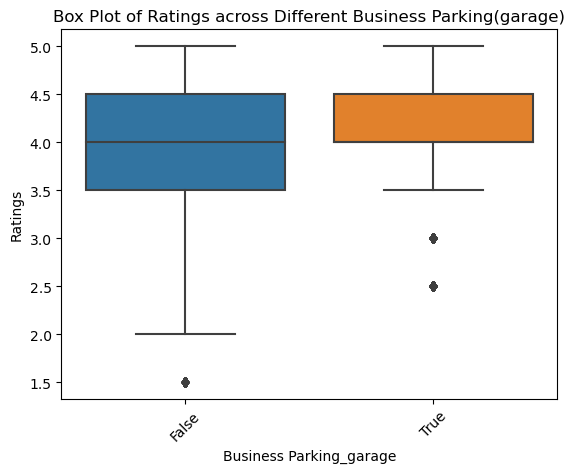

In [ ]:
sns.boxplot(x='BusinessParking_garage', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Business Parking(garage)')
plt.xlabel('Business Parking_garage')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

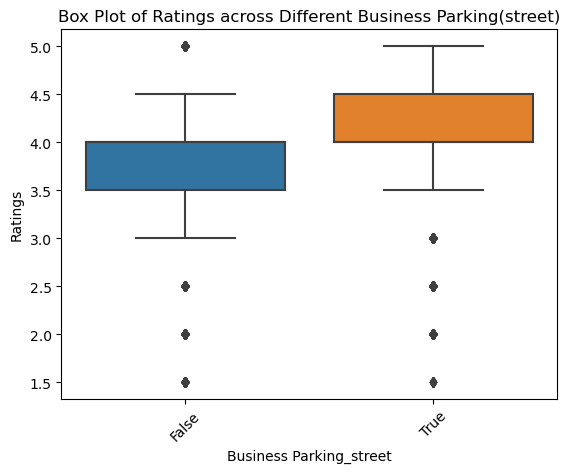

In [ ]:
sns.boxplot(x='BusinessParking_street', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Business Parking(street)')
plt.xlabel('Business Parking_street')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

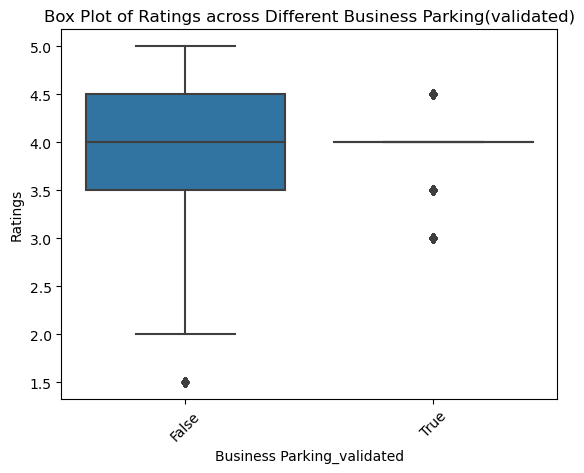

In [ ]:
sns.boxplot(x='BusinessParking_validated', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Business Parking(validated)')
plt.xlabel('Business Parking_validated')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
selected_columns = ['BusinessParking_lot',
                    'BusinessParking_valet']
df_sc_mode = df[selected_columns].mode().iloc[0]
df = df.fillna(dict(zip(selected_columns, df_sc_mode)))

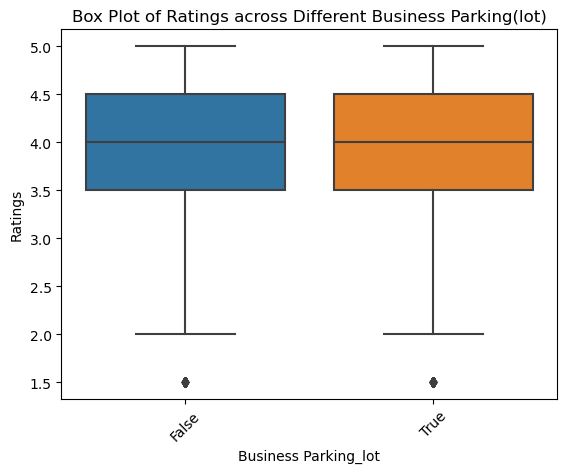

In [ ]:
sns.boxplot(x='BusinessParking_lot', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Business Parking(lot)')
plt.xlabel('Business Parking_lot')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
selected_columns = ['Ambience_touristy',
                    'Ambience_hipster',
                    'Ambience_romantic',
                    'Ambience_divey',
                    'Ambience_intimate',
                    'Ambience_trendy',
                    'Ambience_upscale',
                    'Ambience_classy',
                    'Ambience_casual',
                    'GoodForMeal_dessert',
                    'GoodForMeal_latenight',
                    'GoodForMeal_lunch',
                    'GoodForMeal_dinner',
                    'GoodForMeal_brunch',
                    'GoodForMeal_breakfast']
df[selected_columns] = df[selected_columns].fillna('NotStated')

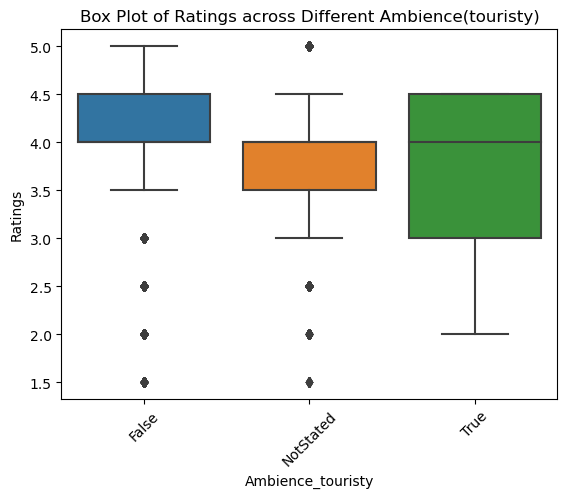

In [ ]:
sns.boxplot(x='Ambience_touristy', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Ambience(touristy)')
plt.xlabel('Ambience_touristy')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

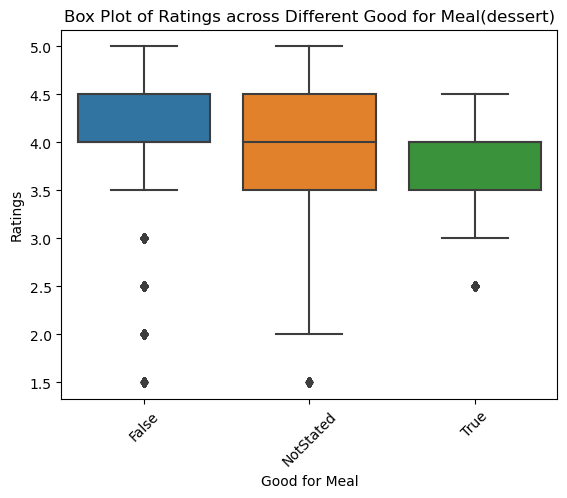

In [ ]:
sns.boxplot(x='GoodForMeal_dessert', y='stars_x', data=df)

plt.title('Box Plot of Ratings across Different Good for Meal(dessert)')
plt.xlabel('Good for Meal')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

todo: 画不同Ambience的数量的bar graph?

In [ ]:
ambience_columns = [
    'Ambience_touristy', 'Ambience_hipster', 'Ambience_romantic',
    'Ambience_divey', 'Ambience_intimate', 'Ambience_trendy',
    'Ambience_upscale', 'Ambience_classy', 'Ambience_casual'
]

# Convert strings 'True'/'False' to Boolean True/False
for col in ambience_columns:
    df[col] = df[col].replace({'True': True, 'False': False})

# Count the number of True values in each Ambience column
true_counts = df[ambience_columns].sum()

# Print the count of True values for each Ambience attribute
print(true_counts)


Series([], dtype: float64)


In [ ]:
Ambience = pd.DataFrame({
    "touristy": [df[df["Ambience_touristy"]==True]["Ambience_touristy"].count()],
    "hipster": [df[df["Ambience_hipster"]==True]["Ambience_hipster"].count()],
    "romantic":[df[df["Ambience_romantic"]==True]["Ambience_romantic"].count()],
    "divey": [df[df["Ambience_divey"]==True]["Ambience_divey"].count()],
    "intimate":[df[df["Ambience_intimate"]==True]["Ambience_intimate"].count()],
    "hipster":[df[df["Ambience_hipster"]==True]["Ambience_hipster"].count()],
    "trendy":[df[df["Ambience_trendy"]==True]["Ambience_trendy"].count()],
    "upscale":[df[df["Ambience_upscale"]==True]["Ambience_upscale"].count()],
    "classy": [df[df["Ambience_classy"]==True]["Ambience_classy"].count()]

})
Ambience

,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy
0,4651,9349,11737,928,4698,19987,2915,81118


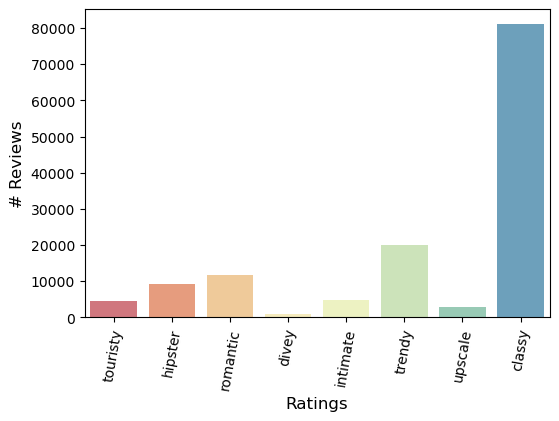

In [ ]:
plt.figure(figsize=(6,4))
x = Ambience.T[0]
ax = sns.barplot(x=x.index, y=x.values, palette='Spectral', alpha=0.8)  # The palette will be applied here

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# Reviews', fontsize=12)
plt.xlabel('Ratings', fontsize=12)

plt.show()

In [ ]:
df = df.drop('elite', axis=1)

In [ ]:
df = df.drop('friends', axis=1)

In [ ]:
df = df.drop(['date', 'name_y'], axis=1)

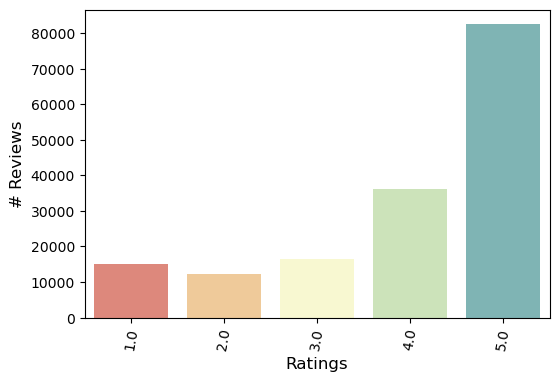

In [ ]:
plt.figure(figsize=(6,4))
x = df['stars_y'].value_counts().sort_index()
ax = sns.barplot(x=x.index, y=x.values, palette='Spectral', alpha=0.8)  # The palette will be applied here

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# Reviews', fontsize=12)
plt.xlabel('Ratings', fontsize=12)

plt.show()

todo: text feature engineering: TF-IDF??

In [ ]:
df_review_count_y = df[df['review_count_y'] <= 2000]

<Axes: xlabel='review_count_y', ylabel='Density'>

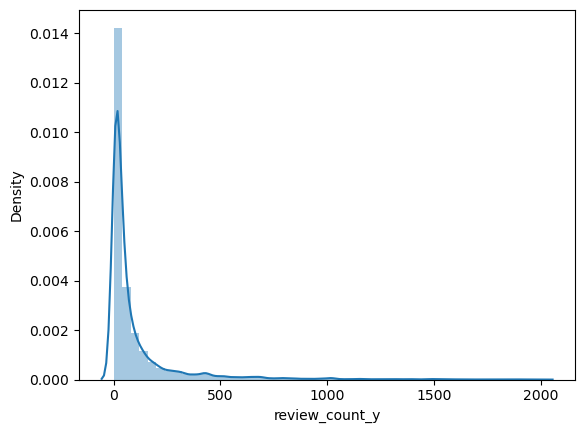

In [ ]:
sns.distplot(df_review_count_y[df_review_count_y['review_count_y'].notnull()]['review_count_y'])

todo: review_count_y 处理

In [ ]:
df['yelping_since'] = pd.to_datetime(df['yelping_since'])
date_to_subtract = pd.to_datetime('2022-01-20 00:00:00')
df['days_used'] = (date_to_subtract - df['yelping_since']).apply(lambda x: x.days)

In [ ]:
df = df.drop(['yelping_since'], axis=1)

todo: yelping_since有用？
计算使用yelp的天数，平均发1帖的天数

<Axes: xlabel='useful_y', ylabel='Density'>

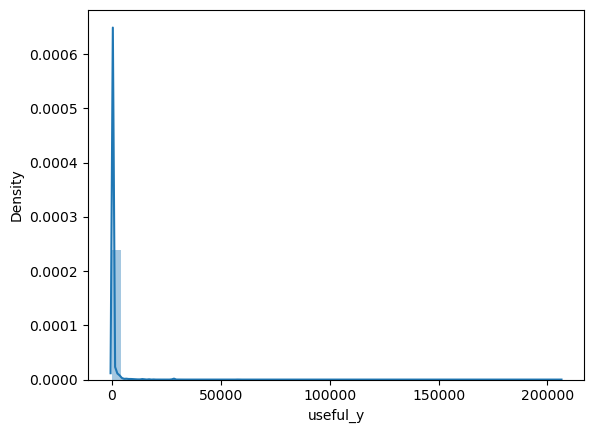

In [ ]:
sns.distplot(df[df['useful_y'].notnull()]['useful_y'])

In [ ]:
cols = ['useful_y', 'funny_y', 'cool_y', 'fans', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute',
        'compliment_list', 'compliment_funny']

for col in cols:
    Count = df[df[col] == 0][col].count()
    print("{}: {}".format(col, Count))

useful_y: 12172
funny_y: 36139
cool_y: 30490
fans: 75598
compliment_hot: 117427
compliment_more: 117850
compliment_profile: 132725
compliment_cute: 141625
compliment_list: 150828
compliment_funny: 104009


todo: 多数user各指标为0，reduce dimension? 先看效果?

<Axes: xlabel='average_stars', ylabel='Density'>

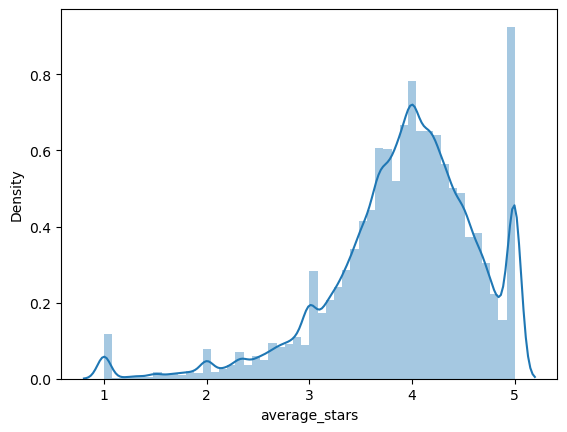

In [ ]:
sns.distplot(df[df['average_stars'].notnull()]['average_stars'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
text_data = df['text'].astype(str)  # Convert to string, NaNs will become 'nan'

# tokenization
text_data = text_data.str.lower()
text_data = text_data.str.replace('[^\w\s]', '', regex=True)

# remove stopwords
stop = stopwords.words('english')
text_data = text_data.apply(lambda x: ' '.join(word for word in x.split() if word not in stop))

lemmatizer = WordNetLemmatizer()
text_data = text_data.apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Considering the top 10 features
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

text_tfidf

[nltk_data] Downloading package wordnet to /Users/liusq/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/liusq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<162283x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 6095111 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_df = pd.DataFrame(text_tfidf.todense(), columns=['tfidf_' + str(i) for i in range(text_tfidf.shape[1])])
tfidf_df

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_2990,tfidf_2991,tfidf_2992,tfidf_2993,tfidf_2994,tfidf_2995,tfidf_2996,tfidf_2997,tfidf_2998,tfidf_2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120255
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133173,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
162279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
162280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
162281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD



# Fit Truncated SVD
svd = TruncatedSVD(n_components=20, random_state=42)
svd.fit(tfidf_df)  # Fit the model with scaled features

# Transform the scaled features using the fitted SVD
reduced_features = svd.transform(tfidf_df)



In [ ]:
reduced_features = pd.DataFrame(reduced_features)

In [ ]:
df = pd.concat([df.reset_index(drop=True), reduced_features.reset_index(drop=True)], axis=1)
df = df.drop('text', axis=1)

In [ ]:
df.iloc[:,0:10]

,business_id,postal_code,stars_x,review_count_x,is_open,RestaurantsTakeOut,NoiseLevel,Caters,RestaurantsReservations,BusinessAcceptsCreditCards
0,yPSejq3_erxo9zdVYTBnZA,93101,4.5,3834,1,True,average,True,False,True
1,yPSejq3_erxo9zdVYTBnZA,93101,4.5,3834,1,True,average,True,False,True
2,yPSejq3_erxo9zdVYTBnZA,93101,4.5,3834,1,True,average,True,False,True
3,yPSejq3_erxo9zdVYTBnZA,93101,4.5,3834,1,True,average,True,False,True
4,yPSejq3_erxo9zdVYTBnZA,93101,4.5,3834,1,True,average,True,False,True
...,...,...,...,...,...,...,...,...,...,...
162278,vyxxsn2l6ELF2Yoxr6BWcw,93108,3.0,7,0,NotStated,average,False,False,True
162279,vyxxsn2l6ELF2Yoxr6BWcw,93108,3.0,7,0,NotStated,average,False,False,True
162280,vyxxsn2l6ELF2Yoxr6BWcw,93108,3.0,7,0,NotStated,average,False,False,True
162281,vyxxsn2l6ELF2Yoxr6BWcw,93108,3.0,7,0,NotStated,average,False,False,True


In [ ]:
df.to_csv("refined data.csv", index = False)